# Bang structure of hydrogen: from single atom to crystal

In [1]:
#import all the needed libraries
from ase import Atoms
from ase.io import write, read
from ase.lattice.hexagonal import *
from ase.visualize import view
from ase.units import Bohr
from ase.lattice.cubic import BodyCenteredCubic
from ase.build import bulk
from gpaw import GPAW, FermiDirac, PoissonSolver, Mixer
import numpy as np
import matplotlib.pyplot as plt
import sys
from IPython.display import Image, display
import warnings; warnings.simplefilter('ignore')

### Density of states

Density of states is the number of levels (states) per interval of energy.

A high DOS at a specific energy level means that there are many states. A DOS of zero means that no energy levels. 

Generally, the density of states of matter is continuous. In isolated systems however, like individual atoms or molecules, the density distribution is discrete like a spectral density.

### Single hydrogen atom

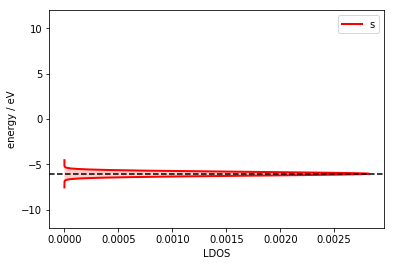

In [2]:
#Define a single hydrogen atom

sys = Atoms('H', positions=[(0, 0, 0)], cell=[5.0,5.1,5.2], pbc=[False,False,False])
sys.center()
write('H0D.png', sys)
display(Image(filename='H0D.png'))

#Define a calculator
calc = GPAW(xc='LDA', 
            mode='lcao',
            h=0.14,
            basis='dzp',
            txt=None)
sys.set_calculator(calc)
sys.get_potential_energy()

#Get the Fermi energy
"""The Fermi energy is a concept in quantum mechanics usually referring to the energy difference 
between the highest and lowest occupied single-particle states in a quantum system of non-interacting 
fermions at absolute zero temperature.
The Fermi level is a total energy level including kinetic energy and potential energy."""
EF = calc.get_fermi_level()

#Get the DOS
en, dos = calc.get_orbital_ldos(0, spin=0, angular='sp', width=0.3, npts=2001)
Sdos = list(np.array([0]*len(dos)) + calc.get_orbital_ldos(0, spin=0, angular='s', width=0.3, npts=2001)[1])

#Plot the LDOS by orbitals (s and p)
plt.plot(Sdos/np.sum(Sdos)*1, en, 'r-', linewidth = 2.0, label = 's')
plt.fill_between(Sdos/np.sum(Sdos)*1, 0, en, linewidth=0, facecolor='r', alpha=0.2)
plt.axhline(y=EF, color='k', linestyle='--')

plt.ylim(-12,12)
plt.xlabel('LDOS')
plt.ylabel('energy / eV')
plt.legend(loc='best')
plt.show()

### Dihydrogen

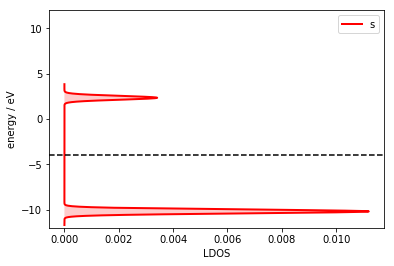

In [3]:
#Define a hydrogen diatomic
sys = Atoms('H2', positions=[(0, 0, 0), (0.74, 0, 0)], cell=[5.0,5.1,5.2], pbc=[False,False,False])
sys.center()
write('H_2.png', sys)
display(Image(filename='H_2.png'))

#Define a calculator
calc = GPAW(xc='LDA', 
            mode='lcao',
            h=0.14,
            basis='dzp',
            txt=None)
sys.set_calculator(calc)
sys.get_potential_energy()

#Get the Fermi energy
EF = calc.get_fermi_level()

#Get the DOS
en, dos = calc.get_orbital_ldos(0, spin=0, angular='sp', width=0.3, npts=2001)
Sdos = list(np.array([0]*len(dos)) + calc.get_orbital_ldos(0, spin=0, angular='s', width=0.3, npts=2001)[1])

#Plot the LDOS by orbitals (s and p)
plt.plot(Sdos/np.sum(Sdos)*1, en, 'r-', linewidth = 2.0, label = 's')
plt.fill_between(Sdos/np.sum(Sdos)*1, 0, en, linewidth=0, facecolor='r', alpha=0.2)
plt.axhline(y=EF, color='k', linestyle='--')

plt.ylim(-12,12)
plt.xlabel('LDOS')
plt.ylabel('energy / eV')
plt.legend(loc='best')
plt.show()

### 1D hydrogen wire

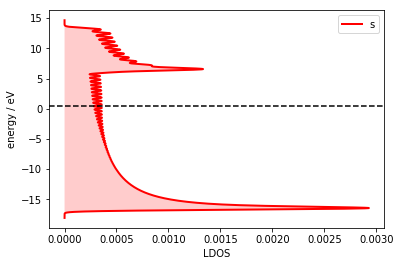

In [4]:
#Define a hydrogen wire
sys = Atoms('H', positions=[(0, 0, 0)], cell=[0.74,5,5], pbc=[True,False,False])
sys.center()
sys=sys*(4,1,1)
write('H1D.png', sys*(1,1,1))
display(Image(filename='H1D.png'))

#Define a calculator
calc = GPAW(xc='LDA', 
            mode='lcao',
            h=0.14,
            kpts=(64,1,1),
            basis='dzp',
            txt=None)
sys.set_calculator(calc)
sys.get_potential_energy()

#Get the Fermi energy
EF = calc.get_fermi_level()

#Get the DOS
en, dos = calc.get_orbital_ldos(0, spin=0, angular='sp', width=0.3, npts=2001)
Sdos = list(np.array([0]*len(dos)) + calc.get_orbital_ldos(0, spin=0, angular='s', width=0.3, npts=2001)[1])

#Plot the LDOS by orbitals (s and p)
plt.plot(Sdos/np.sum(Sdos)*1, en, 'r-', linewidth = 2.0, label = 's')
plt.fill_between(Sdos/np.sum(Sdos)*1, 0, en, linewidth=0, facecolor='r', alpha=0.2)
plt.axhline(y=EF, color='k', linestyle='--')

#plt.ylim(-12,12)
plt.xlabel('LDOS')
plt.ylabel('energy / eV')
plt.legend(loc='best')
plt.show()

### 2D hydrogen slab

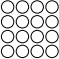

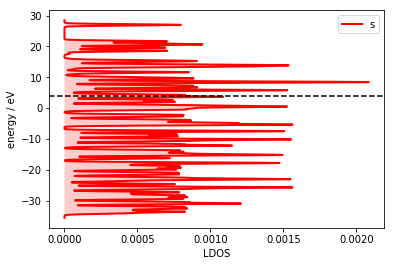

In [5]:
#Define a hydrogen slab
sys = Atoms('H', positions=[(0, 0, 0)], cell=[0.74,0.74,5], pbc=[True,True,False])
sys.center()
sys=sys*(2,2,1)
write('H2D.png', sys*(2,2,1))
display(Image(filename='H2D.png'))

#Define a calculator
calc = GPAW(xc='LDA', 
            mode='lcao',
            h=0.14,
            kpts=(16,16,1),
            basis='dzp',
            txt=None)
sys.set_calculator(calc)
sys.get_potential_energy()

#Get the Fermi energy
EF = calc.get_fermi_level()

#Get the DOS
en, dos = calc.get_orbital_ldos(0, spin=0, angular='sp', width=0.3, npts=2001)
Sdos = list(np.array([0]*len(dos)) + calc.get_orbital_ldos(0, spin=0, angular='s', width=0.3, npts=2001)[1])

#Plot the LDOS by orbitals (s and p)
plt.plot(Sdos/np.sum(Sdos)*1, en, 'r-', linewidth = 2.0, label = 's')
plt.fill_between(Sdos/np.sum(Sdos)*1, 0, en, linewidth=0, facecolor='r', alpha=0.2)
plt.axhline(y=EF, color='k', linestyle='--')

#plt.ylim(-7,7)
plt.xlabel('LDOS')
plt.ylabel('energy / eV')
plt.legend(loc='best')
plt.show()

### 3D hydrogen BCC crystal

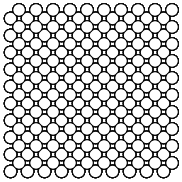

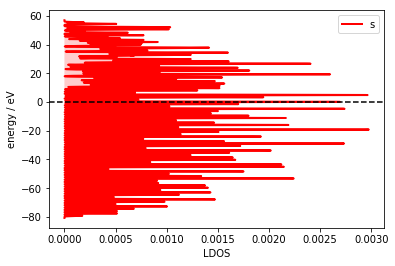

In [6]:
#Define a hydrogen BCC crystal
sys = bulk("H", "bcc", a=0.85, cubic=True)
sys.pbc = (True,True,True) #periodic boundary conditions
sys=sys*(2,2,2)
write('Li3D.png', sys*(5,5,5))
display(Image(filename='Li3D.png'))

#Define a calculator
calc = GPAW(xc='LDA', 
            mode='lcao',
            h=0.14,
            kpts=(8,8,8),
            basis='dzp',
            txt=None)
sys.set_calculator(calc)
sys.get_potential_energy()

#Get the Fermi energy
EF = calc.get_fermi_level()

#Get the DOS
en, dos = calc.get_orbital_ldos(0, spin=0, angular='sp', width=0.3, npts=2001)
Sdos = list(np.array([0]*len(dos)) + calc.get_orbital_ldos(0, spin=0, angular='s', width=0.3, npts=2001)[1])

#Plot the LDOS by orbitals (s and p)
plt.plot(Sdos/np.sum(Sdos)*1, en-EF, 'r-', linewidth = 2.0, label = 's')
plt.fill_between(Sdos/np.sum(Sdos)*1, 0, en-EF, linewidth=0, facecolor='r', alpha=0.2)
plt.axhline(y=0, color='k', linestyle='--')

#plt.ylim(-7,7)
plt.xlabel('LDOS')
plt.ylabel('energy / eV')
plt.legend(loc='best')
plt.show()